<a href="https://colab.research.google.com/github/fora22/Data_Science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀(Logistic Regression)

## 로지스틱 회귀 모델의 확률 추정(벡터 표현식)
$\hat p = h_\theta(\mathbf{x}) = \sigma(\theta^{T} \cdot \mathbf{x})  $

## 로지스틱 함수 : 시그모이드 함수(Sigmoid Function)
$\sigma(t) = {1 \over {1+exp(-t)}}$

## 로지스틱 회귀 모델 예측
$ \hat y = \begin{cases}
0 \quad  when \ \ \hat p < 0.5\\
1 \quad when \ \ \hat p \ge 0.5 
\end{cases} $

## 로지스틱 획의 비용 함수(로그 손실)
$J(\theta) = - {1 \over m} \sum_{i=1}^{m} [y^{(i)} log(\hat p^{(i)}) + (1 - y^(i))log(1-\hat p^{(i)})] $

## 로지스틱 비용함수의 편도함수
${\partial \over \partial \theta_j}J(\theta) = {1 \over m} \sum_{i=1}^{m}(\sigma(\theta^T \cdot \mathbf{x}^{(i)}) - y^{(i)} ) x^{(i)}_j$

In [ ]:
# 그래프 한글 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname = path, size = 10).get_name()
print(font_name)
plt.rc('font', family=font_name)  
fm._rebuild()

NanumBarunGothic


In [ ]:
import numpy as np

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
X = iris["data"][:, 3:]   # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)   # if Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

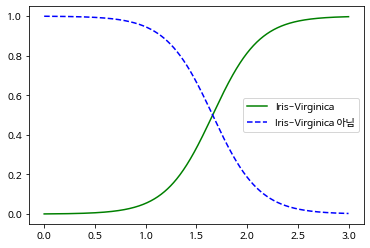

In [ ]:
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = "Iris-Virginica 아님")
plt.legend()

그래프를 살펴보면 x축에서 약 1.6cm인 지점에 결정 경계(Decision Boundary)가 만들어지는 것을 알 수 있다(x축은 꽃잎 너비, y축은 Iris-Virginica의 확률).

따라서 1.5와 1.7을 넣어 예측해보면 1과 0으로 분류되는 것을 알 수 있다.

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

다른 선형 모델처럼 로지스틱 회귀 모델도 $l_1$, $l_2$ 패널티를 사용하여 규제할 수 있다. sklearn은 $l_2$ 패널티를 default로 한다.

* LogisticRegression 모델의 규제 강도를 조절하는 하이퍼파라미터는 `alpha`가 아니고 그 역수에 해당하는 `C`이다. `C`가 높을수록 모델의 규제가 줄어든다.
* `alpha`는 Polynomial Regression.ipynb에서 찾아볼 수 있다.

# 소프트맥스 회귀(Softmax Regression)

로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 분류하도록 지원한다. 이를 소프트맥스 회귀(Softmax Regression) 또는 다항 로지스틱 회귀(Multinomial Logistic Regression)라고 한다.

# 소프트맥스 회귀 개념
샘플 $x$가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 $K$에대하여 점수 $s_k(x)$를 계산하고, 그 점수에 소프트맥스 함수(softmax function 또는 정규화된 지수 함수 : nomalized exponential)를 적용하여 각 클래스의 확률을 추정한다. 

$s_k(x) = (\theta^{(k)})^T \cdot x$

각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있는데, 이는 파라미터 행렬(parameter matrix) $\Theta$에 행으로 저장된다.

샘플 $x$에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 $k$에 속할 확률 $\hat p_k$을 추정할 수 있다. 이 함수는 각 점수에 지수 함수를 적용한 후 정규화 하여 0과 1의 범위로 놓는다.

# 소프트맥스 함수
$\hat p_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^{K} exp(s_j(x))}$
 * $K$는 클래스 수
 * $s(x)$는 샘플 $x$에 대한 각 클래스의 점수를 담고 있는 벡터
 * $\sigma(s(x))_k$는 샘플 $x$에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 $k$에 속할 추정 확률

# 소프트맥스 회귀 분류기의 예측
$\hat y = argmax \sigma(s(x))_k = argmax s_k(x) = argmax  ((\theta^{(k)})^T \cdot x)$

소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측한다(다중 출력이 아님). 그래서 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서만 사용해야 한다. 하나의 사진에서 여러 사람의 얼굴을 인식하는 데는 사용할 수 없다.

* 비용 함수는 **크로스 엔트로피(cross entropy)** 함수를 사용했다.
* $J(\Theta) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y^{(i)}_k log(\hat p^{(i)}_k )  $
* $i$번째 샘플에 대한 타깃 클래스가 $k$일 때 $y^{(i)}_k$가 1이고, 그 외에는 0이다.


# 예제 코드
소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류할 수 있다. sklearn의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 일대다($OvA$) 전략을 사용한다. 하지만 multi_class 매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀를 사용할 수 있다. 소프트맥스 회귀를 사용하려면 solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 한다. 또한 기본적으로 하이퍼파라미터 $C$를 사용하여 조절할 수 있는 $l_2$ 규제가 적용된다.

In [ ]:
X = iris["data"][:, (2,3)]  # 꽃잎 길이, 꽃잎 너비
y = iris['target']

In [ ]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

꽃잎 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고 학습된 모델에 질의하면 94.2%의 확률로 Iris-Virginica(클래스 2)라고 (또는 5.8% 확률로 Iris-Versicolor)라고 출력할 것이다.

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])